# HR Attrition

SETUP

In [1]:
# !pip install kmodes

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
sns.set_theme(style='white', palette='deep')

import warnings
warnings.filterwarnings("ignore")

from kmodes.kmodes import KModes

In [3]:
attrition_data = pd.read_csv("IBM_HR-Attrition.csv")
attrition_data.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


# Drop unnecessary columns

In [4]:
attrition_data.drop(columns=["EmployeeCount", "EmployeeNumber", "StandardHours", "StockOptionLevel"], inplace=True)

In [5]:
attrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [6]:
attrition_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0


In [7]:
attrition_data.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrentRole          False
YearsSinceLast

In [8]:
attrition_data.isna().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrentRole          False
YearsSinceLast

In [9]:
attrition_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
# numeric and categorical columns
num_col = attrition_data.describe().columns.tolist()
cat_col = attrition_data.describe(include="object").columns.tolist()

# num_col
# cat_col

In [11]:
corr = attrition_data[num_col].corr()
corr

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.003634,0.001904,0.053535,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.022704,0.000473,0.007846,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.040235,0.027110,0.006557,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.011111,-0.024539,-0.009118,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.031701,-0.029548,0.007665,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.009062,-0.002172,0.001330,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.017205,-0.029071,0.034297,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.034730,-0.021222,0.021642,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.020002,0.002297,-0.012454,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.027269,-0.017120,0.025873,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


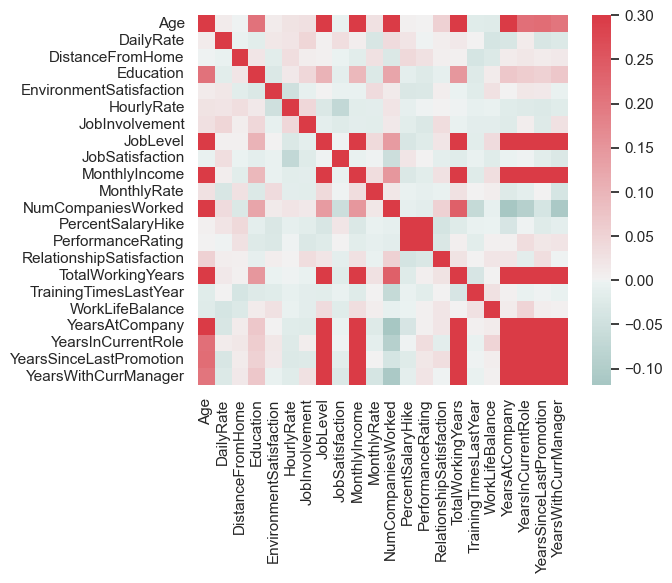

In [12]:
cmap = sns.diverging_palette(180, 10, as_cmap=True)
sns.heatmap(corr, vmax=.3, center=0, cmap=cmap, square=True)
plt.show()

In [13]:
Attrition_Yes = attrition_data[attrition_data["Attrition"] == "Yes"]
Attrition_No = attrition_data[attrition_data["Attrition"] == "No"]
Attrition_Mean = pd.concat((Attrition_Yes.mean(numeric_only=True), Attrition_No.mean(numeric_only=True)), axis=1)
Attrition_Mean.columns = ["Yes","No"]
Attrition_Mean.round(2).style.background_gradient(cmap="Pastel1",axis=1)

,Yes,No
Age,33.610000,37.560000
DailyRate,750.360000,812.500000
DistanceFromHome,10.630000,8.920000
Education,2.840000,2.930000
EnvironmentSatisfaction,2.460000,2.770000
HourlyRate,65.570000,65.950000
JobInvolvement,2.520000,2.770000
JobLevel,1.640000,2.150000
JobSatisfaction,2.470000,2.780000
MonthlyIncome,4787.090000,6832.740000


In [14]:
Attrition_Yes["Attrition"].value_counts() 
# = 237

Yes    237
Name: Attrition, dtype: int64

In [15]:
Attrition_No["Attrition"].value_counts()
# = 1233

No    1233
Name: Attrition, dtype: int64

# EXPLORATORY DATA ANALYSIS

# Attrition Count

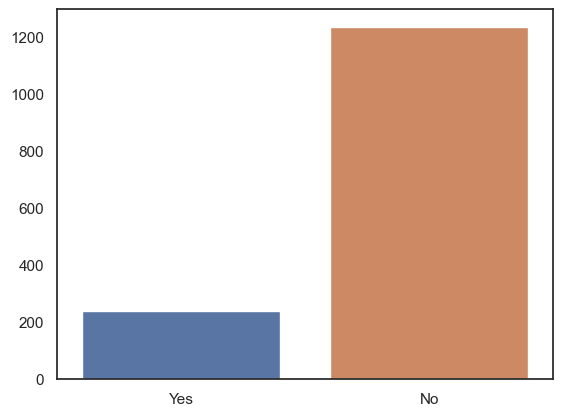

In [16]:
chart_1=sns.countplot(x="Attrition", data=attrition_data).set(xlabel=None, ylabel=None)
plt.show()

# Correlation

Determine numeric and categorical values.

In [17]:
# numeric and categorical columns
num_col = attrition_data.describe().columns.tolist()
cat_col = attrition_data.describe(include="object").columns.tolist()

# num_col
# cat_col

In [18]:
corr = attrition_data[num_col].corr()
corr

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.003634,0.001904,0.053535,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.022704,0.000473,0.007846,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.040235,0.027110,0.006557,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.011111,-0.024539,-0.009118,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.031701,-0.029548,0.007665,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.009062,-0.002172,0.001330,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.017205,-0.029071,0.034297,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.034730,-0.021222,0.021642,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.020002,0.002297,-0.012454,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.027269,-0.017120,0.025873,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


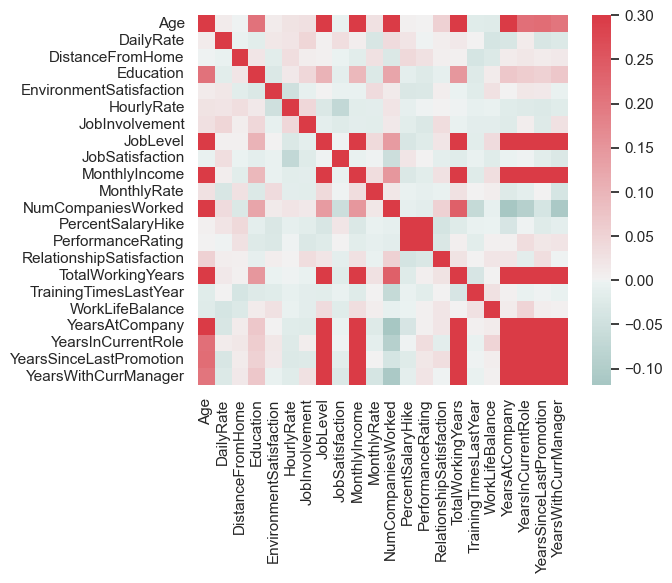

In [19]:
cmap = sns.diverging_palette(180, 10, as_cmap=True)
sns.heatmap(corr, vmax=.3, center=0, cmap=cmap, square=True)
plt.show()

# Age

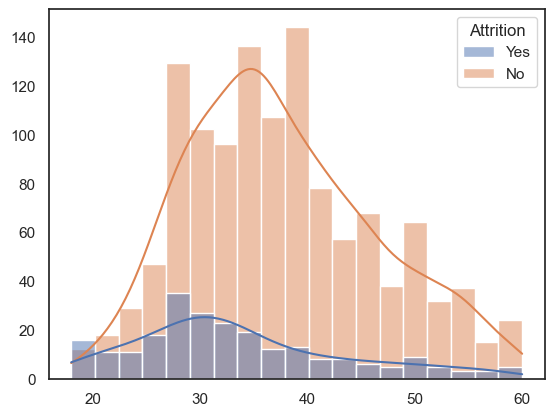

In [20]:
sns.histplot(data=attrition_data, x="Age", hue="Attrition", kde=True).set(xlabel=None, ylabel=None)
plt.show()

# Gender

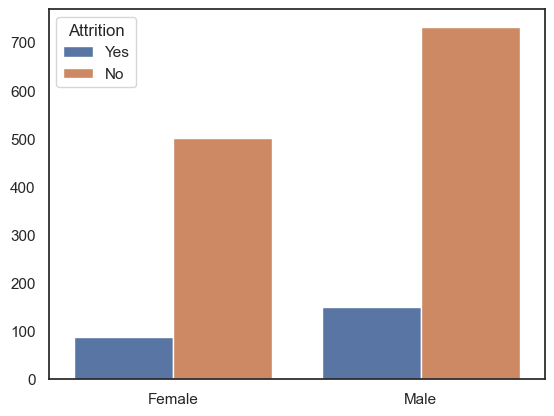

In [21]:
sns.countplot(data=attrition_data, x="Gender", hue="Attrition").set(xlabel=None, ylabel=None)
plt.show()

# Marital Status

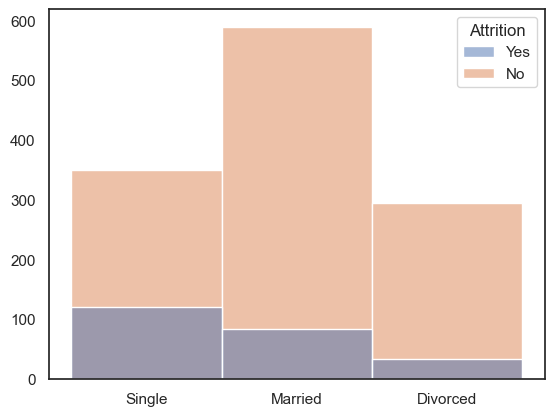

In [22]:
sns.histplot(data=attrition_data, x="MaritalStatus", hue="Attrition").set(xlabel=None, ylabel=None)
plt.show()

# Department

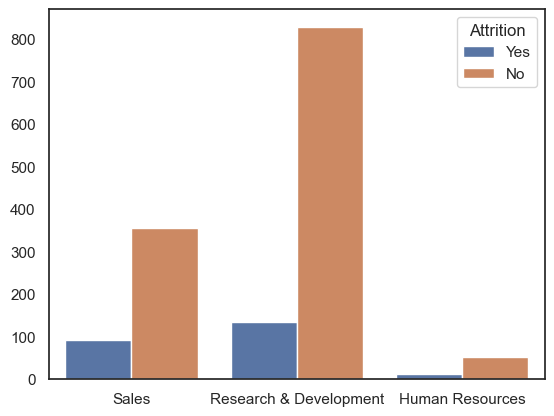

In [23]:
sns.countplot(data=attrition_data, x="Department", hue="Attrition").set(xlabel=None, ylabel=None)
plt.show()

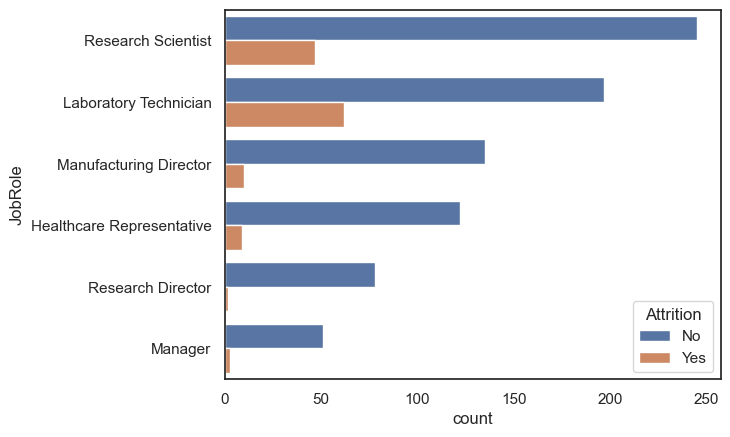

In [24]:
dept_data = attrition_data[attrition_data['Department'] == 'Research & Development']

sns.countplot(data=dept_data, y='JobRole', hue='Attrition')
plt.show()

# Satisfaction

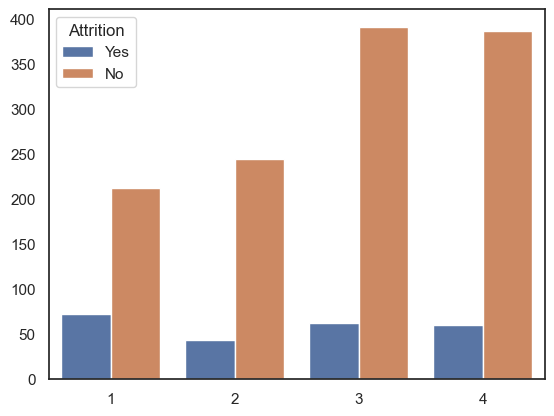

In [25]:
sns.countplot(data=attrition_data, x="EnvironmentSatisfaction", hue="Attrition").set(xlabel=None, ylabel=None)
plt.show()

# Job Satisfaction

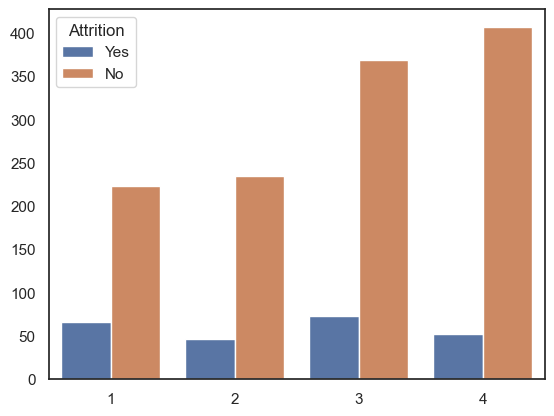

In [26]:
sns.countplot(data=attrition_data, x="JobSatisfaction", hue="Attrition").set(xlabel=None, ylabel=None)
plt.show()

# Travel

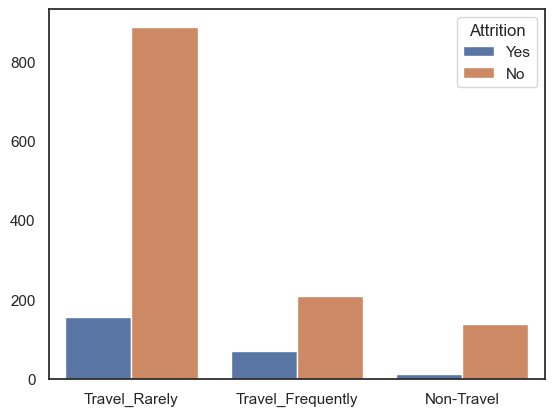

In [27]:
sns.countplot(data=attrition_data, x="BusinessTravel", hue="Attrition").set(xlabel=None, ylabel=None)
plt.show()

# Overtime

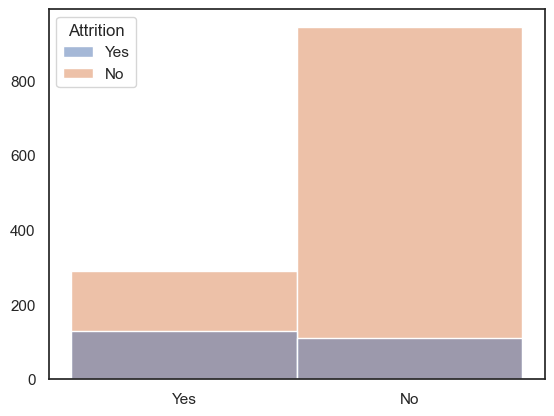

In [28]:
sns.histplot(data=attrition_data, x="OverTime", hue="Attrition").set(xlabel=None, ylabel=None)
plt.show()

# Total Working Years

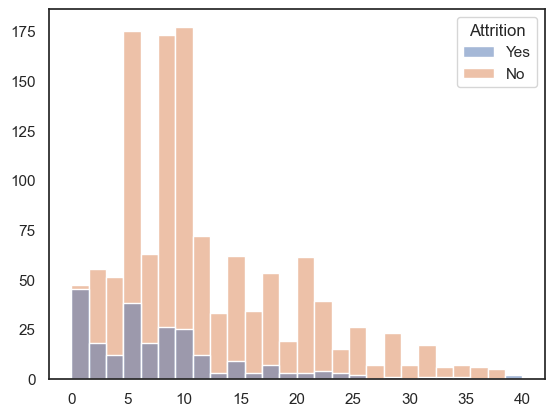

In [29]:
sns.histplot(data=attrition_data, x="TotalWorkingYears", hue="Attrition").set(xlabel=None, ylabel=None)
plt.show()

# Years at Company

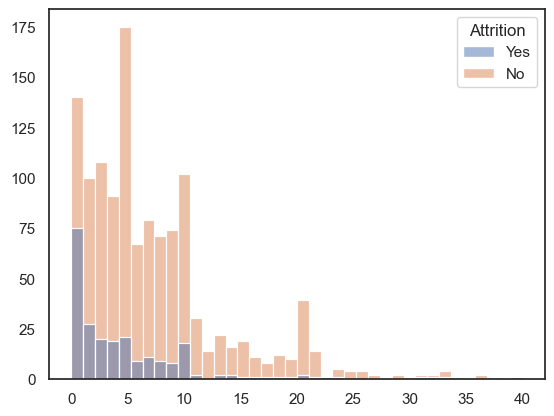

In [30]:
sns.histplot(data=attrition_data, x="YearsAtCompany", hue="Attrition").set(xlabel=None, ylabel=None)
plt.show()

# Years In Current Role

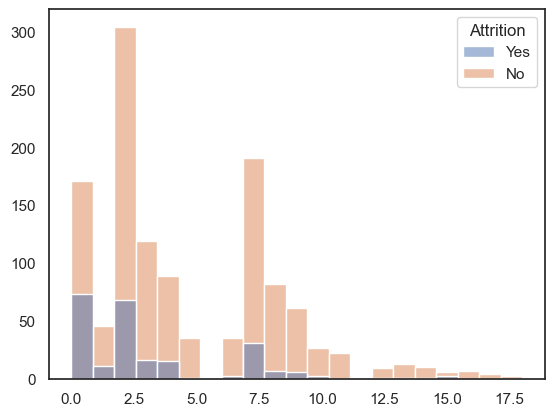

In [31]:
sns.histplot(data=attrition_data, x="YearsInCurrentRole", hue="Attrition").set(xlabel=None, ylabel=None)
plt.show()

# Monthly Income

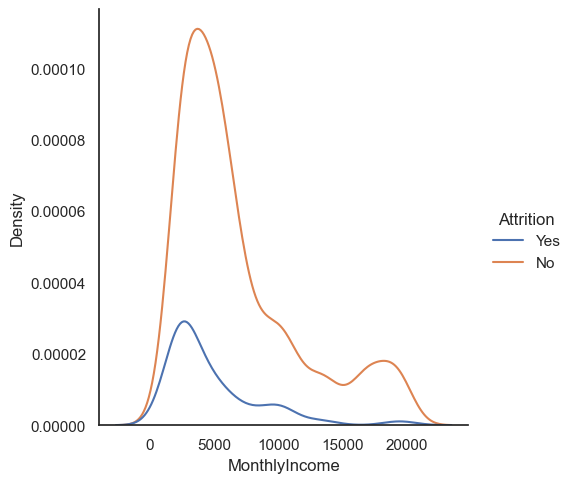

In [32]:
sns.displot(data=attrition_data, x="MonthlyIncome", hue="Attrition", kind="kde")
plt.show()

# Distance From Home

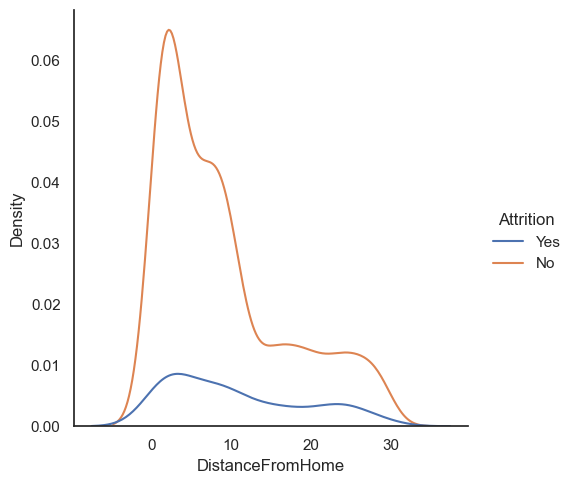

In [33]:
sns.displot(data=attrition_data, x="DistanceFromHome", hue="Attrition", kind="kde")
plt.show()

# Clustering

In [34]:
def run_kmodes(n_clusters=None, filtered_data_cluster=None):
  # Initialize clustering
  kmodes = KModes(
      init="random",
      n_clusters=n_clusters,
      random_state=42
      )
  
  # Apply clustering to the data
  kmodes.fit(attrition_data)

  # Print intertia
  print(f"Cost for n_clusters = {n_clusters}: {kmodes.cost_}")

  return kmodes.cost_, kmodes.labels_

In [35]:
cost_values = []

In [36]:
for k in range(1, 21):
  # Run our function
  cost, labels = run_kmodes(
    n_clusters=k,
    filtered_data_cluster=attrition_data
  )

  # Save cost to our container
  cost_values.append(cost)

Cost for n_clusters = 1: 28527.0
Cost for n_clusters = 2: 27134.0
Cost for n_clusters = 3: 26366.0
Cost for n_clusters = 4: 25907.0
Cost for n_clusters = 5: 25629.0
Cost for n_clusters = 6: 25363.0
Cost for n_clusters = 7: 25224.0
Cost for n_clusters = 8: 25083.0
Cost for n_clusters = 9: 24865.0
Cost for n_clusters = 10: 24801.0
Cost for n_clusters = 11: 24610.0
Cost for n_clusters = 12: 24513.0
Cost for n_clusters = 13: 24392.0
Cost for n_clusters = 14: 24273.0
Cost for n_clusters = 15: 24228.0
Cost for n_clusters = 16: 24119.0
Cost for n_clusters = 17: 24043.0
Cost for n_clusters = 18: 23855.0
Cost for n_clusters = 19: 23829.0
Cost for n_clusters = 20: 23719.0


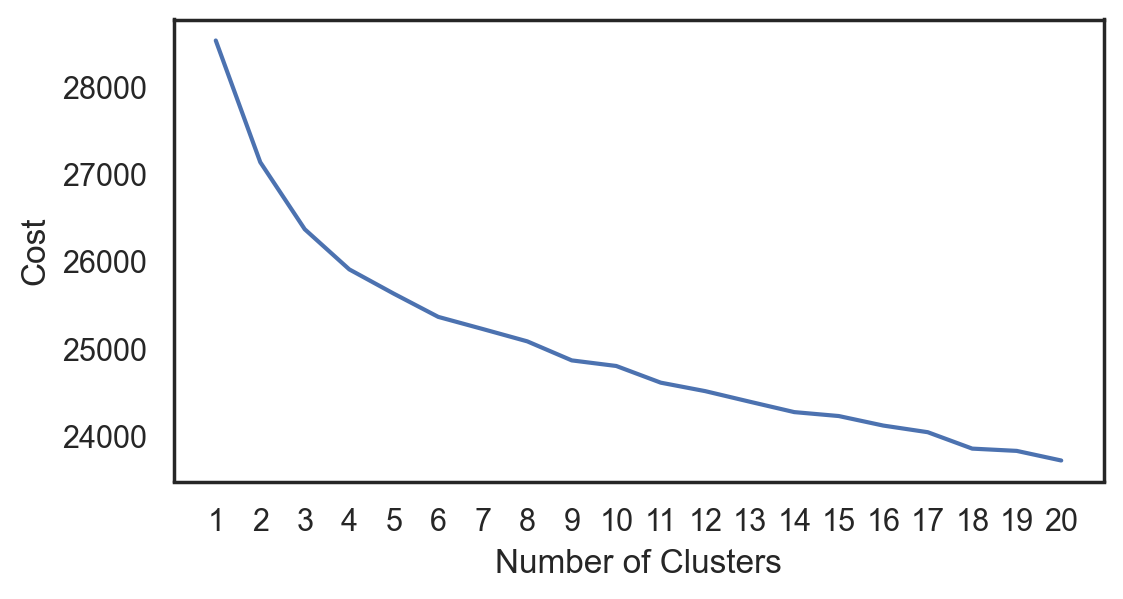

In [37]:
# Set figure size
plt.figure(figsize=(6,3)  , dpi=200)

# Plot inertia vs number of clusters
plt.plot(range(1, 21), cost_values)

# Format plot
plt.xticks(range(1, 21))
plt.xlabel("Number of Clusters")
plt.ylabel("Cost")

# Show plot
plt.show()

In [38]:
# Run our K-Modes function for n_clusters
cost, labels = run_kmodes(
  n_clusters=9,
  filtered_data_cluster=attrition_data
)

Cost for n_clusters = 9: 24865.0


In [39]:
attrition_data['labels']= labels
attrition_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,labels
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,8,0,1,6,4,0,5,7
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,10,3,3,10,7,1,7,1
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,7,3,3,0,0,0,0,2
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,8,3,3,8,7,3,0,2
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,6,3,3,2,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,17,3,3,5,2,0,3,8
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,9,5,3,7,7,1,7,1
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,6,0,3,6,2,0,3,4
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,17,3,2,9,6,0,8,0


In [40]:
attrition_data['labels'].value_counts().sort_index()

0    233
1    194
2    288
3    151
4    190
5    136
6     56
7    116
8    106
Name: labels, dtype: int64

In [41]:
attrition_data.groupby('labels').agg(pd.Series.mode)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
labels,,,,,,,,,,,,,,,,,,,,,
0,35,No,Travel_Rarely,217,Sales,2,3,Life Sciences,4,Male,...,13,3,4,10,2,3,10,7,0,7
1,34,No,Travel_Rarely,688,Research & Development,1,3,Life Sciences,4,Male,...,13,3,1,10,3,3,7,7,1,7
2,30,No,Travel_Rarely,"[202, 1082]",Research & Development,2,3,Life Sciences,3,Male,...,11,3,3,1,3,3,1,0,0,0
3,40,No,Travel_Rarely,"[419, 541, 1111, 1329]",Sales,2,4,Life Sciences,4,Male,...,11,3,3,8,2,3,3,2,1,2
4,27,No,Travel_Rarely,"[201, 691]",Research & Development,2,3,Life Sciences,3,Male,...,13,3,4,6,3,3,5,2,1,2
5,29,No,Travel_Rarely,"[364, 894, 1005, 1017, 1431, 1469]",Research & Development,1,3,Medical,4,Female,...,14,3,3,5,2,3,5,2,0,2
6,35,Yes,Travel_Rarely,"[103, 172, 185, 192, 224, 267, 289, 307, 318, ...",Research & Development,9,4,Life Sciences,3,Male,...,11,3,2,10,2,3,5,2,0,3
7,35,No,Travel_Rarely,"[430, 817]",Sales,1,3,Medical,2,Female,...,14,3,4,10,2,3,2,2,0,2
8,31,No,Travel_Rarely,"[153, 334, 429, 501, 583, 783, 1199]",Research & Development,1,2,Medical,3,Male,...,12,3,4,10,2,3,5,2,0,2


In [42]:
# clustered_data_1 = attrition_data.groupby('labels').agg(pd.Series.mode)
# clustered_data_1.to_csv('clustered_data_1', index=False)